In [1]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import animation as an
import matplotlib as mpl
%matplotlib notebook
#mpl.rcParams['figure.dpi']= 300
import numpy as np
from scipy.integrate import solve_ivp
import random

# Lorenz 96 Model
The Lorenz 96 Model is a one-dimensional atmospheric toy model with $K$ variables, $X_1$,...,$X_K$, governed by the equations,
\begin{align}
\Large\frac{dX_k}{dt}=-X_{k-2}X_{k-1} + X_{k-1}X_{k+1} -X_k + F
\end{align}
with cyclic boundary conditions,
\begin{align}
\Large X_{k-K}=X_{k+K}=X_k
\end{align}
The indices, $k$=1,...,$K$ can be thought to represent locations along a latitudinal band around the globe and the X's to represent some atmospheric quantity (like temperature) at those locations.


This code should be what you saw before - but with the ability to animate the spatial plot instead of viewing slices.

In [13]:
def lorenz96(X, t, K, F):
        #K-component Lorenz 96 model
        dX_dt = np.zeros(K)
        # boundary conditions
        dX_dt[0] = (X[1] - X[K-2]) * X[K-1] - X[0] + F
        dX_dt[1] = (X[2] - X[K-1]) * X[0] - X[1] + F
        dX_dt[K-1] = (X[0] - X[K-3]) * X[K-2] - X[K-1] + F
        # Then the general case
        for i in range(2, K-1):
            dX_dt[i] = (X[i+1] - X[i-2]) * X[i-1] - X[i] + F
        # Return the state derivatives
        return dX_dt
    
def run_Lorenz96(K=36, F=8, number_of_days=30):
    X0 = F * np.ones(K)  # Initial state (equilibrium)
    X0[random.randint(1, K)-1]=X0[random.randint(1, K)-1]+random.uniform(0,.01)
    t = np.arange(0.0, number_of_days, 0.01)
    lon = np.arange(180,-180,-360/K)

    X = odeint(lorenz96, X0, t, args=(K,F))
    return t, lon, X, F, K, number_of_days



This is where you run the code

In [14]:
t, lon, X, F, K, number_of_days = run_Lorenz96(K=36, F=8, number_of_days=30)

Now this will animate the spatial plot (watch the y-axis as it varies)

<IPython.core.display.Javascript object>


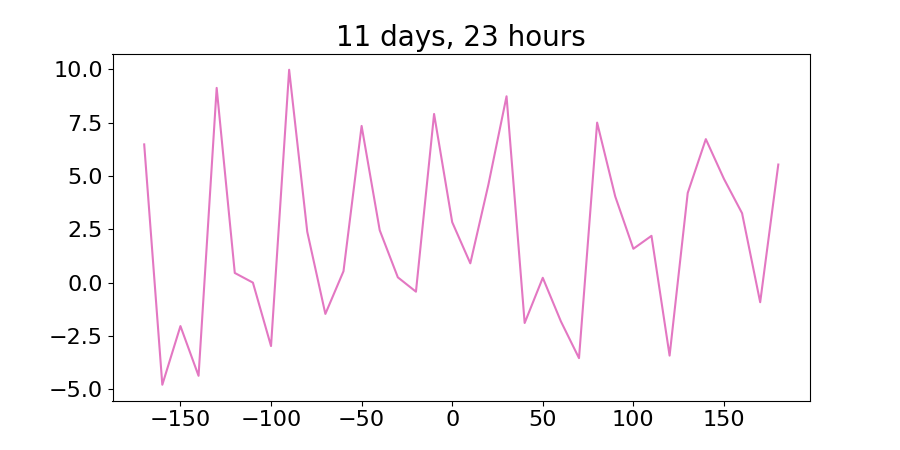

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [25]:
fig, ax = plt.subplots(figsize=(9,4.5))
plt.legend(loc='best')

line, = ax.plot(lon, X[0])
plt.title(label=str(0)+' hours', fontsize=20)
plt.ylabel('$X_k$', fontsize=20); plt.rc('ytick', labelsize=16)
plt.xlabel('longitude', fontsize=20); plt.rc('xtick', labelsize=16)

def animate(i):
    ax.clear()
    line, = ax.plot(lon, X[i], 'tab:pink')
    if i < (len(t)/number_of_days):
        plt.title(label=str(int(i/(len(t)/number_of_days/24)))+' hours', fontsize=20)
    else:
        plt.title(label=str(int(i/(len(t)/number_of_days)))+' days, '+
                        str(int(i%(len(t)/number_of_days)/(len(t)/number_of_days/24)))+ " hours", fontsize=20)

    return line,

ani = an.FuncAnimation(fig, animate, interval = 1)


plt.show()